# 휴먼지능정보공학과 201810757 김민석

## 문제 1

### ganache 8345를 백그라운드로 띄우고, node에서 다음의 실행 결과를 출력하세요.

* (1) 주소0, 주소1 출력

* (2) 주소0, 주소1의 잔고 출력

* (3) 주소1에서 주소2로 1111 wei 전송 (callback 함수에서 전송메시지 출력) 

* (4) 해시 출력 ((3)의 callback으로 출력하지 말고, 전송 완료 후 출력)

* (5) 개스와 개스가격을 곱해서 출력

* (6) nonce 출력

* (7) 주소0과 주소1의 잔고 변화 출력 ((2)로부터 증감이 얼마나 되었는지)

* (8) 잔고의 합계를 더하는 과정 출력

* (9) 잔고의 합계 출력

#### 1. 주소0, 주소1 출력

##### ganache가 이미 열려있어서 바로 진행했습니다.

In [5]:
%%writefile src/getMyAddr.js
var Web3=require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider("http://localhost:8345"))
var myAddr0;
web3.eth.getAccounts().then(console.log);

Overwriting src/getMyAddr.js


In [6]:
!node src/getMyAddr.js

[
  '0x3D5fF9C06e49550eC05a3e07CD487e4adcb0b359',
  '0x0CE4109a0FC594eE9A283895e3Eb197775f83860',
  '0xa8408E006b1Ac96a03F5D7d5F927196fD38E97dC',
  '0xc34861633A721C163db22E5Acf4FfFB6731A43f6',
  '0x36C51273f0c79EF0707a789A47D23F80db9121A5',
  '0x5d3b1Eca43185aBCf8255F6455510255D49c1586',
  '0x685cA28Aa4f44595b73f3635DE5b5BEf437F1d09',
  '0xc42983e5Ee322245E14Bf31340Ae580A850194f4',
  '0x0331fA6DDA9Ff56dACD27606E3801d22B3Fd297D',
  '0x152212e0A22542d9a592Fba6345dD633b5102928'
]


In [39]:
%%writefile src/web3test1.js
var Web3 = require('web3');
var web3 = new Web3(new Web3.providers.HttpProvider('http://localhost:8345'));
console.log("(1) ac0 :");
var my2=web3.eth.getAccounts().then(it => { console.log(it[1]); });
console.log("ac1 :");
var my1=web3.eth.getAccounts().then(it => { console.log(it[0]); });
my1=[]
my2=[]

Overwriting src/web3test1.js


##### 문제 1번 답

In [40]:
!node src/web3test1.js

(1) ac0 :
ac1 :
0x3D5fF9C06e49550eC05a3e07CD487e4adcb0b359
0x0CE4109a0FC594eE9A283895e3Eb197775f83860


#### 2. 주소0, 주소1의 잔고 출력

In [29]:
%%writefile src/midtest.js
console.log("(1) ac0 :");
console.log(web3.fromWei(eth.getBalance(eth.accounts[0])))
var a=web3.fromWei(eth.getBalance(eth.accounts[0]))
console.log("ac1 :");
console.log(web3.fromWei(eth.getBalance(eth.accounts[1])))
var b=web3.fromWei(eth.getBalance(eth.accounts[1]))

Overwriting src/midtest.js


##### 문제 2번 답

In [30]:
!geth --exec "loadScript('src/midtest.js')" attach http://localhost:8345

(1) ac0 :
999.998739554
ac1 :
1000
null


#### 3. 주소1에서 주소2로 1111 wei 전송 (callback 함수에서 전송메시지 출력)

In [42]:
%%writefile src/midtest1.js
eth.sendTransaction({from:"0x3D5fF9C06e49550eC05a3e07CD487e4adcb0b359", to:"0x0CE4109a0FC594eE9A283895e3Eb197775f83860", value:web3.toWei(1111,"wei")})

Writing src/midtest1.js


#### 4. 해시 출력 ((3)의 callback으로 출력하지 말고, 전송 완료 후 출력)

##### 4번 문제 답

In [43]:
!geth --exec "loadScript('src/midtest1.js')" attach http://localhost:8345

"0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9"


#### 5. 개스와 개스가격을 곱해서 출력

In [50]:
!geth --exec "eth.getTransaction('0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9')" attach http://localhost:8345

{
  accessList: [],
  blockHash: "0xac7376b87f217c9e962a273a05b5057a51901580c9e2e7faa71865527d238acc",
  blockNumber: 11,
  chainId: "0x539",
  from: "0x3d5ff9c06e49550ec05a3e07cd487e4adcb0b359",
  gas: 90000,
  gasPrice: 293435034,
  hash: "0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9",
  input: "0x",
  maxFeePerGas: 293435034,
  maxPriorityFeePerGas: 1000000000,
  nonce: 10,
  r: "0xcad68ea513d00cabef66b69376134f4b38997c4065822ce21f3d029d4bae494",
  s: "0x5b93bb855e6b64ee0930097218899ccb9b0fa0737227ac6178cf355537675018",
  to: "0x0ce4109a0fc594ee9a283895e3eb197775f83860",
  transactionIndex: 0,
  type: "0x2",
  v: "0x0",
  value: 1111
}


##### 5번 문제 답

In [57]:
%%writefile src/midtest2.js
var a=eth.getTransaction('0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9').gas
var b=eth.getTransaction('0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9').gasPrice
console.log(a*b)

Overwriting src/midtest2.js


In [58]:
!geth --exec "loadScript('src/midtest2.js')" attach http://localhost:8345

26409153060000
null


#### 6. nonce 출력

In [59]:
!geth --exec "eth.getTransactionCount('0x4a647f2811c4b94ac50f73d85b5b60809c634a9227e4699fba4a00188ea72ab9')" attach http://localhost:8345

0


In [60]:
!geth --exec "eth.getBlock('latest')" attach http://localhost:8345

{
  baseFeePerGas: 231849904,
  difficulty: 1,
  extraData: "0x",
  gasLimit: 30000000,
  gasUsed: 21000,
  hash: "0xac7376b87f217c9e962a273a05b5057a51901580c9e2e7faa71865527d238acc",
  logsBloom: "0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000",
  miner: "0x0000000000000000000000000000000000000000",
  mixHash: "0x0000000000000000000000000000000000000000000000000000000000000000",
  nonce: "0x0000000000000000",
  number: 11,
  parentHash: "0xb1f47fc4809e73d6a0188da11199cc1c36bba773137f041b8871c98d8f2f19ca",
  receiptsRoot: "0xf

In [61]:
!geth --exec "eth.getTransactionCount('0xac7376b87f217c9e962a273a05b5057a51901580c9e2e7faa71865527d238acc')" attach http://localhost:8345

0


##### 6번 문제 답 :  nounce는 0이 나온다.

#### 7. 주소0과 주소1의 잔고 변화 출력 ((2)로부터 증감이 얼마나 되었는지)

##### 1111wei 전송 전의 잔고
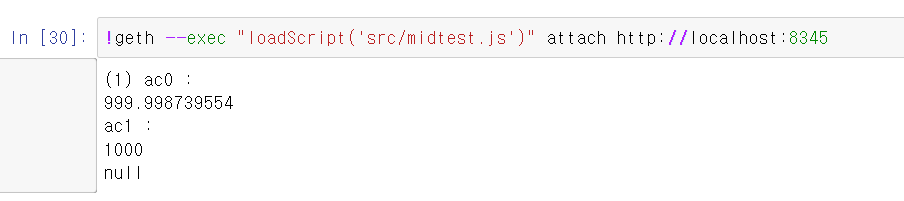

##### 1111wei 전송 후의 잔고

In [44]:
!geth --exec "loadScript('src/midtest.js')" attach http://localhost:8345

(1) ac0 :
999.998733391864284889
ac1 :
1000.000000000000001111
null


##### 7번 문제 답
0번계좌에서는 1111wei만큼 감소하였고, 1번계좌에서는 1111wei만큼 증가하였다.

#### 8. 잔고의 합계를 더하는 과정 출력

###### 8번 풀지 못함

#### 9. 잔고의 합계 출력

In [70]:
%%writefile src/midtest3.js
console.log(web3.fromWei(eth.getBalance(eth.accounts[0])))
var a=web3.fromWei(eth.getBalance(eth.accounts[0]))
console.log(web3.fromWei(eth.getBalance(eth.accounts[1])))
var b=web3.fromWei(eth.getBalance(eth.accounts[1]))
a=[]
b=[]
console.log(a+b);

Overwriting src/midtest3.js


In [71]:
!geth --exec "loadScript('src/midtest3.js')" attach http://localhost:8345

999.998733391864284889
1000.000000000000001111

null


## 문제 2

### * (1) Counter 컨트랙을 구현하세요. add(), subtract(), getCount() 함수를 구현하고, 여기에 호출하는 시점을 출력하기 위해 다음 함수를 추가하세요. 강의자료의 Counter와 Timer를 참조하세요.
```
function setTimeCalled() internal 호출시점을 설정
function getTimeCalled() view public returns(uint256) 호출시점을 조회
```
REMIX에서 각 함수를 실행해보고, 우하단 창에 출력되는 성공로그를 복사해서 붙여넣기 하세요. 아래는 샘플입니다.
* (2) 로컬에서 컴파일하세요. 파일로 abi, bytecode를 작성하세요.

* (3) 파일로부터 abi, bytecode를 읽어서 배포하세요. 배포부터 geth 8445로 연결하여 node로 하세요 (ganache 8345로 하면 감점).

* (4-1) 배포된 주소로 부터 객체를 생성하고, 바로 계수와 호출시점을 출력하세요.

* (4-2) 계수를 1회 증가시키세요. 증가한 후, 증가된 계수와 호출시점을 출력하세요.

* (4-3) 위 (4-2)를 1회 반복하세요.

In [72]:
%%writefile src/Counter.sol
pragma solidity ^0.6.0;
contract Counter {
    uint256 counter = 0;
    function add() public {
        counter++;
    }
    function subtract() public {
        counter--;
    }
    function getCounter() public view returns (uint256) {
        return counter;
    }
}

Writing src/Counter.sol


#### 2번 문제 답

In [73]:
!solc --abi --bin --gas src/Counter.sol


======= src/Counter.sol:Counter =======
Gas estimation:
construction:
   5099 + 42200 = 47299
external:
   add():	20959
   getCounter():	1035
   subtract():	20984
Binary:
60806040526000805534801561001457600080fd5b5060d3806100236000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c80634f2be91f1460415780636deebae31460495780638ada066e146051575b600080fd5b6047606d565b005b604f6080565b005b60576094565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea2646970667358221220fa0ce8c75e45c23c90833aee8783a06295736e3acb11c771f1c209199ecc71c164736f6c63430006040033
Contract JSON ABI
[{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"f

In [79]:
%%writefile src/counterDeploy.js
var Web3=require('web3');
var web3;
if (typeof web3 !== 'undefined') {
    web3 = new Web3(web3.currentProvider);
} else {
    web3 = new Web3(new Web3.providers.HttpProvider("http://117.16.44.45:8345"));
}

var _abiArray=[{"inputs":[],"name":"add","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"getCounter","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"subtract","outputs":[],"stateMutability":"nonpayable","type":"function"}];
var _bin="60806040526000805534801561001457600080fd5b5060d3806100236000396000f3fe6080604052348015600f57600080fd5b5060043610603c5760003560e01c80634f2be91f1460415780636deebae31460495780638ada066e146051575b600080fd5b6047606d565b005b604f6080565b005b60576094565b6040518082815260200191505060405180910390f35b6000808154809291906001019190505550565b600080815480929190600190039190505550565b6000805490509056fea2646970667358221220fa0ce8c75e45c23c90833aee8783a06295736e3acb11c771f1c209199ecc71c164736f6c63430006040033";
var _contract = new web3.eth.Contract(_abiArray);
_contract
    .deploy({data:"0x"+_bin})
    .send({from: "0x0A815B7818A8e6BC27B430e41Edc8FC455F658c2", gas: 364124, gasPrice: '1000000000'})
    .then(function(newContractInstance){
        console.log(newContractInstance.options.address) // instance with the new contract address
    });

Overwriting src/counterDeploy.js


In [80]:
!node src/counterDeploy.js

C:\Users\rhfog\Code\Block\myproject\node_modules\web3-core-helpers\src\errors.js:42
        return new Error(message);
               ^

Error: Invalid JSON RPC response: ""
    at Object.InvalidResponse (C:\Users\rhfog\Code\Block\myproject\node_modules\web3-core-helpers\src\errors.js:42:16)
    at XMLHttpRequest.request.onreadystatechange (C:\Users\rhfog\Code\Block\myproject\node_modules\web3-providers-http\src\index.js:106:32)
    at XMLHttpRequestEventTarget.dispatchEvent (C:\Users\rhfog\Code\Block\myproject\node_modules\xhr2-cookies\dist\xml-http-request-event-target.js:34:22)
    at XMLHttpRequest._setReadyState (C:\Users\rhfog\Code\Block\myproject\node_modules\xhr2-cookies\dist\xml-http-request.js:208:14)
    at XMLHttpRequest._onHttpRequestError (C:\Users\rhfog\Code\Block\myproject\node_modules\xhr2-cookies\dist\xml-http-request.js:349:14)
    at ClientRequest.<anonymous> (C:\Users\rhfog\Code\Block\myproject\node_modules\xhr2-cookies\dist\xml-http-request.js:252:61)
    at Clien